<h1>Data Science Capstone Project</h1>

## BUSINESS UNDERSTANDING

<p>
The Seattle government is going to prevent avoidable car accidents by employing methods that alert drivers, health system, and police to remind them to be more careful in critical situations.
    
    
 In most cases, not paying enough attention during driving, abusing drugs and alcohol or driving at very high speed are the main causes of occurring accidents that can be prevented by enacting harsher regulations. Besides these reasons, weather, visibility, or road conditions are also the major uncontrollable factors that can be prevented by revealing hidden patterns in the data and announcing warning to the local government, police and drivers on the targeted roads.
    
The target audience of the project will be local government, police and car insurance companies. The model and its results are going to provide some advice for the target audience to make insightful decisions for reducing the number of accidents and injuries.
</p>

<h5> Here we have been given a dataset of all the accidents occured since 2004</h5>

<p>With the help of the provided dataset we will try to predict that what are some of the main reasons behind those Severity.


# Data Analysis

### We have used the Seattle Collision dataset.

<p>Dataset contains several attributes such as:
  <ol>
      <li>SEVERITYCODE</li>
      <li>X</li>
      <li>Y</li>
      <li>OBJECTID</li>
      <li>INCKEY</li>
      <li>COLDETKEY</li>
      <li>REPORTNO</li>
      <li>STATUS</li>
      <li>ADDRTYPE</li>
      <li>INTKEY</li>
      <li>LOCATION</li>
      <li>EXCEPTRSNCODE</li>
      <li>EXCEPTRSNDESC</li>
      <li>SEVERITYCODE.1</li>
      <li>SEVERITYDESC</li>
      <li>COLLISIONTYPE</li>
      <li>PERSONCOUNT</li>
      <li>PEDCOUNT</li>
      <li>PEDCYLCOUNT</li>
      <li>VEHCOUNT</li>
      <li>INCDATE</li>
      <li>INCDTTM</li>
      <li>JUNCTIONTYPE</li>
      <li>SDOT_COLCODE</li>
      <li>SDOR_COLDESC</li>
      <li>INATTENTIONIND</li>
      <li>UNDERINFL</li>
      <li>WEATHER</li>
      <li>ROADCOND</li>
      <li>LIGHTCOND</li>
      <li>PEDROWNOTGRNT</li>
      <li>SDOTCOLUMN</li>
      <li>SPEEDING</li>
      <li>ST_COLCODE</li>
      <li>ST_COLDESC</li>
      <li>SEGLANEKEY</li>
      <li>CROSSWALKKEY</li>
      <li>HITPARKEDCAR</li>
      </ol>
</p>

<p>Our predictor or target variable will be <b>'SEVERITYCODE'</b> because it is used to measure the severity of an accident i.e., 0/1 within the dataset.</p>
<ul><li>0 - Property damage only.</li>
    <li>1- Severe Injury </li>
    </ul>

<p>Attributes used to weigh the severity of an accident are <b>' WEATHER '</b>, <b>' ROADCOND '</b>,<b> ' ADDRTYPE ' </b>,<b>'COLLISIONTYPE'</b> and <b>'LIGHTCOND'</b>.</p>

<h3>Extract Dataset & Convert</h3>


<p>In it's original form, this data is not fit for analysis. For one, there are many columns that we will not use for this model. Also, most of the features are of type object, when they should be numerical type.</p>

<h5>Let's import the Data Collision dataset</h5>

In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv',low_memory=False)
df.head()
df.fillna(0)
df.columns

cdf=df[['SEVERITYCODE','WEATHER','ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','ROADCOND', 'LIGHTCOND']]
cdf.head()

cdf.dropna(inplace=True)

<ipython-input-1-52a0a84a2f07>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf.dropna(inplace=True)


In [2]:
cdf.head()

,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,ROADCOND,LIGHTCOND
0,2,Overcast,Intersection,Angles,At Intersection (intersection related),Wet,Daylight
1,1,Raining,Block,Sideswipe,Mid-Block (not related to intersection),Wet,Dark - Street Lights On
2,1,Overcast,Block,Parked Car,Mid-Block (not related to intersection),Dry,Daylight
3,1,Clear,Block,Other,Mid-Block (not related to intersection),Dry,Daylight
4,2,Raining,Intersection,Angles,At Intersection (intersection related),Wet,Daylight


In [3]:
cdf.COLLISIONTYPE.value_counts()

Parked Car    43119
Angles        34453
Rear Ended    33641
Other         22960
Sideswipe     18285
Left Turn     13637
Pedestrian     6513
Cycles         5362
Right Turn     2929
Head On        1996
Name: COLLISIONTYPE, dtype: int64

In [4]:
import seaborn as sns

In [5]:
cdf.SEVERITYCODE=cdf.SEVERITYCODE.map(lambda SEVERITYCODE:SEVERITYCODE-1)
cdf.head()

C:\Users\Kishu\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,JUNCTIONTYPE,ROADCOND,LIGHTCOND
0,1,Overcast,Intersection,Angles,At Intersection (intersection related),Wet,Daylight
1,0,Raining,Block,Sideswipe,Mid-Block (not related to intersection),Wet,Dark - Street Lights On
2,0,Overcast,Block,Parked Car,Mid-Block (not related to intersection),Dry,Daylight
3,0,Clear,Block,Other,Mid-Block (not related to intersection),Dry,Daylight
4,1,Raining,Intersection,Angles,At Intersection (intersection related),Wet,Daylight


In [6]:
new=cdf[cdf.SEVERITYCODE==1]

In [7]:
new.ADDRTYPE.value_counts()
#From here we can see that severity occurs mostly at Block and Intersection type

Block           29252
Intersection    27344
Alley              29
Name: ADDRTYPE, dtype: int64

In [8]:
cdf.drop('JUNCTIONTYPE',axis=1,inplace=True)

new.drop(['JUNCTIONTYPE'],axis=1,inplace=True)

C:\Users\Kishu\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
cdf.COLLISIONTYPE.value_counts()

Parked Car    43119
Angles        34453
Rear Ended    33641
Other         22960
Sideswipe     18285
Left Turn     13637
Pedestrian     6513
Cycles         5362
Right Turn     2929
Head On        1996
Name: COLLISIONTYPE, dtype: int64

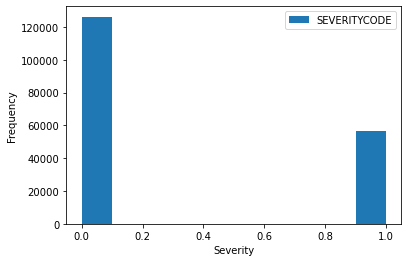

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
cdf.plot(kind='hist')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

In [11]:
cdf.SEVERITYCODE.value_counts()

0    126270
1     56625
Name: SEVERITYCODE, dtype: int64

<h3>Downsampling the inbalanced data</h3>

In [12]:
from sklearn.utils import resample
dfmin=cdf[cdf.SEVERITYCODE==1]
dfmaj=cdf[cdf.SEVERITYCODE==0]
df_maj_down=resample(dfmaj,replace=False,n_samples=56657,random_state=123)
df_cust=pd.concat([dfmin,df_maj_down])


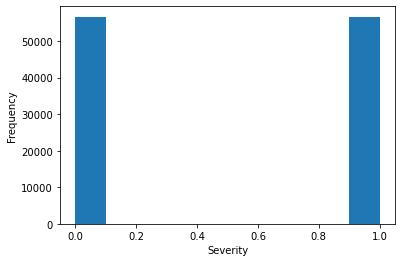

In [13]:
df_cust.SEVERITYCODE.plot(kind='hist')
plt.xlabel('Severity')
plt.ylabel('Frequency')
plt.show()

In [14]:
df_cust = df_cust.reindex(np.random.permutation(df_cust.index))

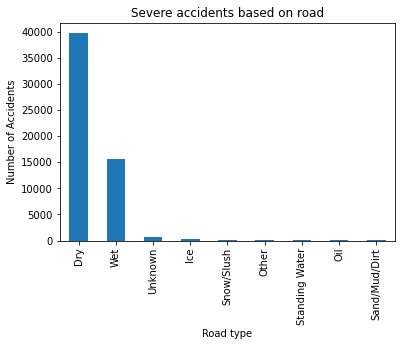

In [15]:
df_cust[df_cust.SEVERITYCODE==1].ROADCOND.value_counts().plot(kind='bar')
plt.title('Severe accidents based on road')
plt.ylabel('Number of Accidents')
plt.xlabel('Road type')
plt.show()

<h4>It displays that most of the severe accidents occured in dry road</h4>

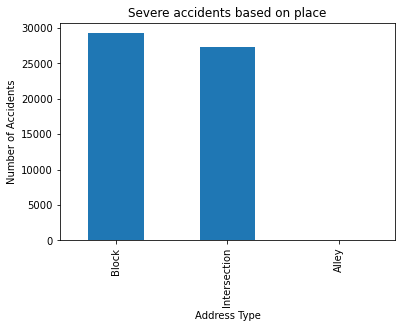

In [16]:
df_cust[df_cust.SEVERITYCODE==1].ADDRTYPE.value_counts().plot(kind='bar')
plt.title('Severe accidents based on place')
plt.ylabel('Number of Accidents')
plt.xlabel('Address Type')
plt.show()

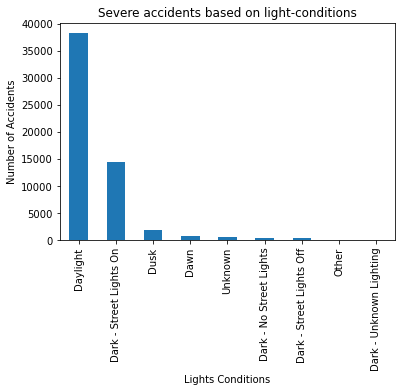

In [17]:
df_cust[df_cust.SEVERITYCODE==1].LIGHTCOND.value_counts().plot(kind='bar')
plt.title('Severe accidents based on light-conditions')
plt.ylabel('Number of Accidents')
plt.xlabel('Lights Conditions')
plt.show()

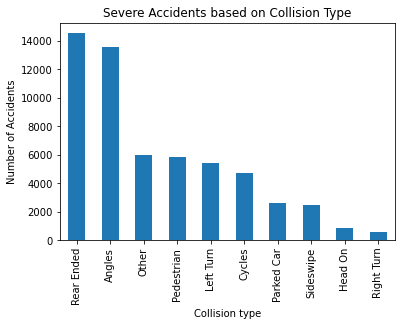

In [18]:
df_cust[df_cust.SEVERITYCODE==1].COLLISIONTYPE.value_counts().plot(kind='bar')
plt.title('Severe Accidents based on Collision Type')
plt.ylabel('Number of Accidents')
plt.xlabel('Collision type')
plt.show()

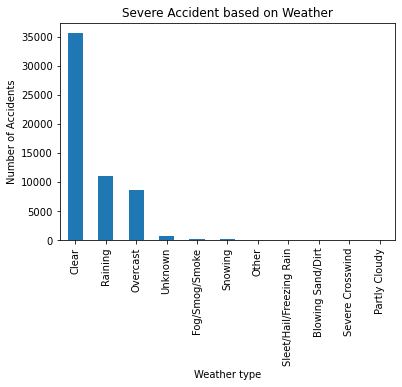

In [19]:
df_cust[df_cust.SEVERITYCODE==1].WEATHER.value_counts().plot(kind='bar')
plt.title('Severe Accident based on Weather')
plt.ylabel('Number of Accidents')
plt.xlabel('Weather type')
plt.show()

In [20]:
df_cust.SEVERITYCODE.value_counts()

0    56657
1    56625
Name: SEVERITYCODE, dtype: int64

In [21]:
#no of unique values in each column:
for col in df_cust[0:]:
    print(col, ':' , len(df_cust[col].unique()))

SEVERITYCODE : 2
WEATHER : 11
ADDRTYPE : 3
COLLISIONTYPE : 10
ROADCOND : 9
LIGHTCOND : 9


<h3>Count Frequency Encoding</h3>

In [22]:
df_collision_freq=df_cust.COLLISIONTYPE.value_counts().to_dict()

In [23]:
df_cust.COLLISIONTYPE=df.COLLISIONTYPE.map(df_collision_freq)

In [24]:
df_cust.head(5)

,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND
92223,0,Clear,Block,20719.0,Dry,Daylight
64078,1,Clear,Block,23041.0,Dry,Daylight
133642,0,Clear,Intersection,4999.0,Dry,Daylight
107592,1,Clear,Intersection,4999.0,Dry,Daylight
7798,0,Clear,Block,20719.0,Dry,Daylight


In [25]:
df_road_freq=df_cust.ROADCOND.value_counts().to_dict()
df_cust.ROADCOND=df.ROADCOND.map(df_road_freq)

In [26]:
df_cust.head()

,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND
92223,0,Clear,Block,20719.0,76729.0,Daylight
64078,1,Clear,Block,23041.0,76729.0,Daylight
133642,0,Clear,Intersection,4999.0,76729.0,Daylight
107592,1,Clear,Intersection,4999.0,76729.0,Daylight
7798,0,Clear,Block,20719.0,76729.0,Daylight


In [27]:
df_light_freq=df_cust.LIGHTCOND.value_counts().to_dict()

In [28]:
df_cust.LIGHTCOND=df_cust.LIGHTCOND.map(df_light_freq)

In [29]:
df_weather_freq=df_cust.WEATHER.value_counts().to_dict()
df_cust.WEATHER=df_cust.WEATHER.map(df_weather_freq)

In [30]:
addr_dummy=pd.get_dummies(df_cust.ADDRTYPE)
addr_dummy.head(3)



,Alley,Block,Intersection
92223,0,1,0
64078,0,1,0
133642,0,0,1


In [31]:
df_new=df_cust.reset_index()

In [32]:
#df_new.drop(['index','level_0'],axis=1,inplace=True)

In [33]:
df_new.head()

,index,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND
0,92223,0,68555,Block,20719.0,76729.0,72061
1,64078,1,68555,Block,23041.0,76729.0,72061
2,133642,0,68555,Intersection,4999.0,76729.0,72061
3,107592,1,68555,Intersection,4999.0,76729.0,72061
4,7798,0,68555,Block,20719.0,76729.0,72061


In [34]:
addr_dummy=addr_dummy.reset_index()
addr_dummy.head(3)

,index,Alley,Block,Intersection
0,92223,0,1,0
1,64078,0,1,0
2,133642,0,0,1


In [35]:
addr_dummy.drop('index',axis=1,inplace=True)
addr_dummy.head(3)

,Alley,Block,Intersection
0,0,1,0
1,0,1,0
2,0,0,1


In [36]:
df_new.head()

,index,SEVERITYCODE,WEATHER,ADDRTYPE,COLLISIONTYPE,ROADCOND,LIGHTCOND
0,92223,0,68555,Block,20719.0,76729.0,72061
1,64078,1,68555,Block,23041.0,76729.0,72061
2,133642,0,68555,Intersection,4999.0,76729.0,72061
3,107592,1,68555,Intersection,4999.0,76729.0,72061
4,7798,0,68555,Block,20719.0,76729.0,72061


In [37]:
df_new2=pd.concat([df_new,addr_dummy],axis=1)

In [38]:
df_new2.drop('ADDRTYPE',axis=1,inplace=True)
df_new2.head()

,index,SEVERITYCODE,WEATHER,COLLISIONTYPE,ROADCOND,LIGHTCOND,Alley,Block,Intersection
0,92223,0,68555,20719.0,76729.0,72061,0,1,0
1,64078,1,68555,23041.0,76729.0,72061,0,1,0
2,133642,0,68555,4999.0,76729.0,72061,0,0,1
3,107592,1,68555,4999.0,76729.0,72061,0,0,1
4,7798,0,68555,20719.0,76729.0,72061,0,1,0


In [39]:
df_new2.columns=[col.upper() for col in df_new2.columns]

In [40]:
df_new2.columns

Index(['INDEX', 'SEVERITYCODE', 'WEATHER', 'COLLISIONTYPE', 'ROADCOND',
       'LIGHTCOND', 'ALLEY', 'BLOCK', 'INTERSECTION'],
      dtype='object')

In [41]:
x_data=df_new2[['WEATHER', 'COLLISIONTYPE', 'ROADCOND',
       'LIGHTCOND', 'ALLEY', 'BLOCK', 'INTERSECTION']]
y_data=df_new2['SEVERITYCODE']
print(x_data.head(3),y_data.head(3))

   WEATHER  COLLISIONTYPE  ROADCOND  LIGHTCOND  ALLEY  BLOCK  INTERSECTION
0    68555        20719.0   76729.0      72061      0      1             0
1    68555        23041.0   76729.0      72061      0      1             0
2    68555         4999.0   76729.0      72061      0      0             1 0    0
1    1
2    0
Name: SEVERITYCODE, dtype: int64


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<h4>Normalizing x_data </h4>

In [43]:
s=StandardScaler()
s.fit(x_data)
x_scale=s.transform(x_data)

In [44]:
x_scale

array([[ 0.80013996,  0.55103956,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [ 0.80013996,  0.88858629,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [ 0.80013996, -1.73416056,  0.67249689, ..., -0.03242808,
        -1.26550097,  1.26831446],
       ...,
       [-1.21743433,  0.55103956,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [-1.21743433,  0.55103956,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [ 0.80013996, -1.56756772,  0.67249689, ..., -0.03242808,
        -1.26550097,  1.26831446]])

<h3> Model Selection </h3>

<h3> Decision Tree</h3>

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
xtrain,xtest,ytrain,ytest=train_test_split(x_scale,y_data,test_size=0.2,random_state=1)

In [47]:
xtrain

array([[-1.07291366,  0.88858629, -1.21970605, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [ 0.80013996, -0.46130991,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [ 0.80013996,  0.87768362,  0.67249689, ..., -0.03242808,
        -1.26550097,  1.26831446],
       ...,
       [ 0.80013996,  0.88858629,  0.67249689, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [-1.07291366, -1.06793459, -1.21970605, ..., -0.03242808,
         0.79020089, -0.788448  ],
       [ 0.80013996,  0.87768362,  0.67249689, ..., -0.03242808,
        -1.26550097,  1.26831446]])

In [48]:
dt=DecisionTreeClassifier(criterion="entropy",max_depth=10)
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [49]:
yhat=dt.predict(xtest)

In [50]:
from sklearn import metrics
from sklearn.metrics import f1_score
#from sklearn.metrics import jaccard_similarity_score
print('F1 Score:',f1_score(ytest,yhat,average='weighted'))
print('Accuracy-Score:', metrics.accuracy_score(ytest,yhat))

F1 Score: 0.6910356306565526
Accuracy-Score: 0.6922805314030984


In [51]:
yhat[0:10]

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 0], dtype=int64)

<h3>K-Nearest Neighbour </h3>

In [52]:
from sklearn.neighbors import KNeighborsClassifier
li={}
for k in range(1,10):
    neig=KNeighborsClassifier(n_neighbors=k).fit(xtrain,ytrain)
    yhat=neig.predict(xtest)
    acc_score=metrics.accuracy_score(ytest,yhat)
    li[k]=acc_score
print(li)

{1: 0.6373306262965088, 2: 0.6115107913669064, 3: 0.6287681511232731, 4: 0.6227655912080152, 5: 0.623030410027806, 6: 0.6299156993423666, 7: 0.651763251975107, 8: 0.6488943814273734, 9: 0.6491150637771991}


In [53]:
best_k = max(li, key=li.get)
best_k

7

In [54]:
neig=KNeighborsClassifier(n_neighbors=best_k).fit(xtrain,ytrain)
yhat=neig.predict(xtest)
print('Best K for KNN model :',best_k,
      '\nCorresponding Accuracy:',metrics.accuracy_score(ytest,yhat))

Best K for KNN model : 7 
Corresponding Accuracy: 0.651763251975107


<h3>Logistic Regression</h3>

In [55]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
yhat=lr.predict(xtest)

In [56]:
print('f1 score:',metrics.f1_score(ytest,yhat))
print('Accuracy score:',metrics.accuracy_score(ytest,yhat))

f1 score: 0.5764662212323681
Accuracy score: 0.5971223021582733


<h3>Support Vector Machines (SVM)</h3>

In [57]:
from sklearn import svm
clf=svm.SVC(kernel='rbf')
clf.fit(xtrain,ytrain)
yhat_svm=clf.predict(xtest)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools
cnf=confusion_matrix(ytest,yhat_svm)
np.set_printoptions(precision=2)
print('Classification Report:\n',classification_report(ytest,yhat_svm))

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.48      0.58     11292
           1       0.61      0.83      0.71     11365

    accuracy                           0.65     22657
   macro avg       0.67      0.65      0.64     22657
weighted avg       0.67      0.65      0.64     22657



In [59]:
print('f1 score:' , metrics.f1_score(ytest,yhat_svm))

f1 score: 0.7058867613444748


In [60]:
print('Accuracy_score:',metrics.accuracy_score(ytest,yhat_svm))

Accuracy_score: 0.6535728472436775
